In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.4 MB/s 
     |████████████████████████████████| 690 kB 45.3 MB/s 
     |████████████████████████████████| 4.7 MB 37.4 MB/s 
     |████████████████████████████████| 596 kB 52.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 102 kB 10.7 MB/s 
     |████████████████████████████████| 812 kB 41.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3424ac34b780cecfd97cbce880be451683cfd4b42a24ef887e709fcb7754847d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=ed445ac260b66d014d785995d3f8511d4ec610e39392839d4d63c0009866840a
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Click the file icon on the left tab, and click the upload icon to upload Columbia_CLI.csv
data = pd.read_csv('Columbia_CLI_mod.csv')

In [ ]:
data.head()

CLI       term  int_rate grade emp_length home_ownership  annual_inc  \
0   5000  36 months     10.65     B  10+ years           RENT     24000.0   
1   2500  60 months     15.27     C   < 1 year           RENT     30000.0   
2   2400  36 months     15.96     C  10+ years           RENT     12252.0   
3  10000  36 months     13.49     C  10+ years           RENT     49200.0   
4   3000  60 months     12.69     B     1 year           RENT     80000.0   

   loan_status    dti  inq_last_6mths  
0   Fully Paid  27.65               1  
1  Charged Off   1.00               5  
2   Fully Paid   8.72               2  
3   Fully Paid  20.00               1  
4      Current  17.94               0

In [ ]:
data['loan_status'].value_counts()

Fully Paid            729
Charged Off           176
Current                91
Late (31-120 days)      2
Default                 1
Name: loan_status, dtype: int64

In [ ]:
data['term'] = data['term'].replace(['36 months'], 36)
data['term'] = data['term'].replace(['60 months'], 60)

data['grade'] = data['grade'].replace(['A'], 1)
data['grade'] = data['grade'].replace(['B'], 2)
data['grade'] = data['grade'].replace(['C'], 3)
data['grade'] = data['grade'].replace(['D'], 4)
data['grade'] = data['grade'].replace(['E'], 5)
data['grade'] = data['grade'].replace(['F'], 6)
data['grade'] = data['grade'].replace(['G'], 7)

data['emp_length'] = data['emp_length'].replace(['< 1 year'], 0)
data['emp_length'] = data['emp_length'].replace(['1 year'], 1)
data['emp_length'] = data['emp_length'].replace(['2 years'], 2)
data['emp_length'] = data['emp_length'].replace(['3 years'], 3)
data['emp_length'] = data['emp_length'].replace(['4 years'], 4)
data['emp_length'] = data['emp_length'].replace(['5 years'], 5)
data['emp_length'] = data['emp_length'].replace(['6 years'], 6)
data['emp_length'] = data['emp_length'].replace(['7 years'], 7)
data['emp_length'] = data['emp_length'].replace(['8 years'], 8)
data['emp_length'] = data['emp_length'].replace(['9 years'], 9)
data['emp_length'] = data['emp_length'].replace(['10+ years'], 10)

#data['home_ownership'] = data['home_ownership'].replace(['RENT'], 0)
#data['home_ownership'] = data['home_ownership'].replace(['MORTGAGE'], 1)
#data['home_ownership'] = data['home_ownership'].replace(['OWN'], 2)

#data['loan_status'] = data['loan_status'].replace(['Default'], 0)
#data['loan_status'] = data['loan_status'].replace(['Charged Off'], 1)
#data['loan_status'] = data['loan_status'].replace(['Current'], 2)
#data['loan_status'] = data['loan_status'].replace(['Fully Paid'], 3)
#data['loan_status'] = data['loan_status'].replace(['Late (31-120 days)'], 4)

In [ ]:
#One-Hot Encoding

traindata = pd.get_dummies(data, columns=['loan_status', 'home_ownership'])
traindata.shape

(999, 16)

In [ ]:
pred = traindata.drop(['grade'], axis=1)
target = traindata['grade']

In [ ]:
pred.isnull().sum()

CLI                0
term               0
int_rate           0
emp_length        17
home_ownership     0
annual_inc         0
loan_status        0
dti                0
inq_last_6mths     0
dtype: int64

In [ ]:
pred['emp_length'].fillna(pred['emp_length'].mean(),inplace=True)


In [ ]:
pred.isnull().sum()

CLI               0
term              0
int_rate          0
emp_length        0
home_ownership    0
annual_inc        0
loan_status       0
dti               0
inq_last_6mths    0
dtype: int64

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pred, target, test_size=0.3, random_state=42)

In [ ]:
import pandas_profiling
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set:  99.67


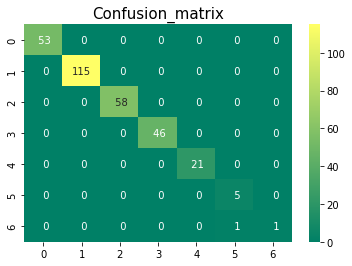

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(max_depth=16, random_state=77)

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

# predict the model output ith test data 

print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: ',round(accuracy_score(y_pred, y_test) * 100, 2))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

acc_dt = round(accuracy_score(y_pred, y_test) * 100, 2)


--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 95.0



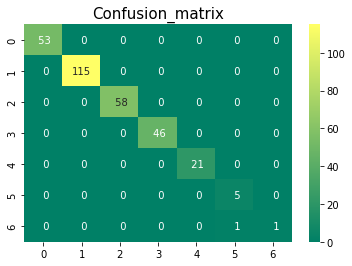

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
rf_model = RandomForestClassifier(criterion='gini', n_estimators=700,                             
                                       min_samples_split=10,min_samples_leaf=1,                             
                                       max_features='auto',oob_score=True,                             
                                       random_state=1,n_jobs=-1)
rf_model.fit(x_train,y_train)
y_pred_rm=rf_model.predict(x_test)
# predict the model output ith test data 

print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set:', round(accuracy_score(y_pred_rm,y_test)*100,2))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

print()

In [ ]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 2.4 MB/s 
     |████████████████████████████████| 167 kB 30.6 MB/s 
     |████████████████████████████████| 636 kB 35.2 MB/s 
     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 1.7 MB 34.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 134 kB 63.3 MB/s 
     |████████████████████████████████| 17.9 MB 37.6 MB/s 
     |████████████████████████████████| 3.3 MB 32.7 MB/s 
     |████████████████████████████████| 2.0 MB 53.8 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 10.4 MB 38.7 MB/s 
     |████████████████████████████████|

In [ ]:
import jinja2
from pycaret.classification import *
exp_clf = setup(data = data, target = 'grade', session_id=123)

Description             Value
0                               session_id               123
1                                   Target             grade
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data         (999, 10)
5                           Missing Values              True
6                         Numeric Features                 4
7                     Categorical Features                 5
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (699, 30)
12                    Transformed Test Set         (300, 30)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2b61
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9986  0.3993  0.9857  0.9979   
gbc          Gradient Boosting Classifier    0.9986  0.3986  0.9857  0.9979   
lightgbm  Light Gradient Boosting Machine    0.9971  0.4000  0.9714  0.9957   
lda          Linear Discriminant Analysis    0.9471  0.3987  0.8436  0.9450   
nb                            Naive Bayes    0.9414  0.3984  0.8264  0.9399   
rf               Random Forest Classifier    0.9299  0.3971  0.7195  0.9117   
et                 Extra Trees Classifier    0.7854  0.3782  0.6382  0.7763   
ada                  Ada Boost Classifier    0.7725  0.3708  0.5143  0.6621   
ridge                    Ridge Classifier    0.5250  0.0000  0.3431  0.4846   
lr                    Logistic Regression    0.3977  0.2805  0.2396  0.4046   
dummy                    Dummy Classifier    0.3434  0.2000  0.1571  0.1179   
knn                K Neighbors Classifier    0.2803  0.2107  0.1747  0.2446   
qda       Quadratic Discriminant Analysis    0.2360  0.2105  0.1506  0.2595   
svm                   SVM - Linear Kernel    0.2160  0.0000  0.1646  0.0704   

              F1   Kappa     MCC  TT (Sec)  
dt        0.9981  0.9981  0.9982     0.017  
gbc       0.9981  0.9981  0.9982     0.969  
lightgbm  0.9962  0.9963  0.9963     0.184  
lda       0.9428  0.9312  0.9325     0.018  
nb        0.9372  0.9235  0.9247     0.016  
rf        0.9195  0.9081  0.9089     0.524  
et        0.7770  0.7178  0.7195     0.484  
ada       0.6982  0.6938  0.7342     0.125  
ridge     0.4939  0.3630  0.3687     0.018  
lr        0.3585  0.1638  0.1750     0.983  
dummy     0.1755  0.0000  0.0000     0.017  
knn       0.2553  0.0246  0.0252     0.126  
qda       0.2262  0.0206  0.0216     0.022  
svm       0.1000  0.0147  0.0196     0.066

# XGBoost Stuff

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix


Import Data

In [ ]:
data = pd.read_csv('Columbia_CLI_mod.csv')

In [ ]:
#Continuous Data
data['term'] = data['term'].replace(['36 months'], 36)
data['term'] = data['term'].replace(['60 months'], 60)

data['grade'] = data['grade'].replace(['A'], 1)
data['grade'] = data['grade'].replace(['B'], 2)
data['grade'] = data['grade'].replace(['C'], 3)
data['grade'] = data['grade'].replace(['D'], 4)
data['grade'] = data['grade'].replace(['E'], 5)
data['grade'] = data['grade'].replace(['F'], 6)
data['grade'] = data['grade'].replace(['G'], 7)

data['emp_length'] = data['emp_length'].replace(['< 1 year'], 0)
data['emp_length'] = data['emp_length'].replace(['1 year'], 1)
data['emp_length'] = data['emp_length'].replace(['2 years'], 2)
data['emp_length'] = data['emp_length'].replace(['3 years'], 3)
data['emp_length'] = data['emp_length'].replace(['4 years'], 4)
data['emp_length'] = data['emp_length'].replace(['5 years'], 5)
data['emp_length'] = data['emp_length'].replace(['6 years'], 6)
data['emp_length'] = data['emp_length'].replace(['7 years'], 7)
data['emp_length'] = data['emp_length'].replace(['8 years'], 8)
data['emp_length'] = data['emp_length'].replace(['9 years'], 9)
data['emp_length'] = data['emp_length'].replace(['10+ years'], 10)

In [ ]:
#One-Hot Encoding

traindata = pd.get_dummies(data, columns=['loan_status', 'home_ownership'])
traindata.shape

(999, 16)

In [ ]:
pred = traindata.drop(['grade'], axis=1)
target = traindata['grade']

In [ ]:
pred['emp_length'].fillna(pred['emp_length'].mean(),inplace=True)

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pred, target, test_size=0.3, random_state=42)

XGBoost Basic Model Building

In [ ]:
#For classification use 'objective='binary:logistic''
#For multi-class classification use 'objective='multi:softmax''

clf_xgb = xgb.XGBClassifier(objective='multi:softmax', missing = None, seed = 42)
clf_xgb.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=50,
            eval_metric='mlogloss',
            eval_set=[(x_test,y_test)])

[0]	validation_0-mlogloss:1.61799
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.38413
[2]	validation_0-mlogloss:1.2027
[3]	validation_0-mlogloss:1.05548
[4]	validation_0-mlogloss:0.932871
[5]	validation_0-mlogloss:0.828685
[6]	validation_0-mlogloss:0.738977
[7]	validation_0-mlogloss:0.660978
[8]	validation_0-mlogloss:0.592662
[9]	validation_0-mlogloss:0.532433
[10]	validation_0-mlogloss:0.479203
[11]	validation_0-mlogloss:0.431935
[12]	validation_0-mlogloss:0.389843
[13]	validation_0-mlogloss:0.35225
[14]	validation_0-mlogloss:0.318658
[15]	validation_0-mlogloss:0.288568
[16]	validation_0-mlogloss:0.26158
[17]	validation_0-mlogloss:0.237345
[18]	validation_0-mlogloss:0.215564
[19]	validation_0-mlogloss:0.196114
[20]	validation_0-mlogloss:0.178474
[21]	validation_0-mlogloss:0.162587
[22]	validation_0-mlogloss:0.148402
[23]	validation_0-mlogloss:0.135495
[24]	validation_0-mlogloss:0.123981
[25]	validation_0-mlogloss:0.11348
[26]	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

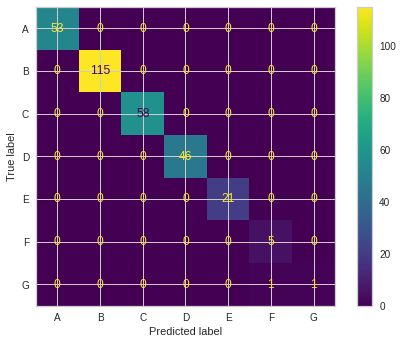

In [ ]:
plot_confusion_matrix(clf_xgb,
                      x_test,
                      y_test,
                      values_format='d',
                      display_labels=['A','B','C','D','E','F','G'])

In [ ]:
clf_xgb.fit(x_train,y_train)
y_pred_rm=clf_xgb.predict(x_test)
print(accuracy_score(y_pred_rm,y_test)*100)

99.66666666666667


In [ ]:
sns.violinplot(data=data, x="grade", y="CLI")


In [ ]:
sns.violinplot(data=data, x="grade", y="term")


In [ ]:
sns.violinplot(data=data, x="grade", y="int_rate")


In [ ]:
sns.violinplot(data=data, x="grade", y="emp_length")


In [ ]:
sns.violinplot(data=data, x="grade", y="home_ownership")


In [ ]:
sns.violinplot(data=data, x="grade", y="annual_inc")


In [ ]:
sns.violinplot(data=data, x="grade", y="loan_status")


In [ ]:
sns.violinplot(data=data, x="grade", y="dti")


In [ ]:
sns.violinplot(data=data, x="grade", y="inq_last_6mths")